# **Israel Elections Data Analysis**

An example notebook showing how to read and display the Israel 2021 elections results. This is the notebook for the first week.

In [3]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')



Running on CoLab


In [4]:
# First install tha needed packages using conda in the current Jupyter kernel
# Run once - should take a long time!
import sys
#if not(run_in_colab):
#  !conda install --yes --prefix {sys.prefix} numpy
#  !conda install --yes --prefix {sys.prefix} pandas
#  !conda install --yes --prefix {sys.prefix} matplotlib
#  !conda install --yes --prefix {sys.prefix} statsmodels  # statistical modelling 
#  !conda install --yes --prefix {sys.prefix} xlrd  # read excel 



# Alternatively, if your python wasn't installed using anaconda, we can use pip install: 
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib


In [5]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First, we need to mount our local drive to the colab network

In [6]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/Or Zuk/Google Drive/HUJI/Teaching/Lab_52568/Data/Elections/"  


Mounted at /content/drive


In [7]:
# Loading elections 2021 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving votes per ballot 2021.csv to votes per ballot 2021.csv
Saving votes per city 2021.csv to votes per city 2021.csv


In [33]:
import io

data_type = "city" # "ballot"  # city
if   run_in_colab:
    df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2021_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of ballot
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[8:-1]] # removing "metadata" columns
    else:
        df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of cities 
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
# Dataset is now stored in a Pandas Dataframe

In [34]:
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
print("{} votes in March 2021".format(df_2021_raw['כשרים']['מעטפות חיצוניות']) + ' מעטפות חיצוניות ')

421619 votes in March 2021 מעטפות חיצוניות 


In [37]:
# df_2021.reset_index(inplace=True)
df_2021.style.set_properties(**{'text-align': 'left'})
df_2021.head()

,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8
אדירים,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8
איבים,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [38]:
from matplotlib import pyplot as plt


In [39]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2021, 0.001)  # total votes for each party

In [40]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, city):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes = df.loc[city,names] / df.loc[city,names].sum()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='b')
    city_bar = ax.bar(np.arange(n)+width, list(city_votes), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2019')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', city[::-1]))
    plt.show()

    return fig, ax

In [41]:
def find_top_city(df, party):

  votes_percent_per_city = df.div(df.sum(axis=1), axis=0)
  print(votes_percent_per_city[party].max())
  print(votes_percent_per_city[party].idxmax())

In [42]:
# Show party votes for two parties
def two_parties_scatter(df, party1, party2):
    votes_per_city = df.sum(axis=1)
    party_share1 = df[party1] / votes_per_city
    party_share2 = df[party2] / votes_per_city

    plt.scatter(party_share1, party_share2)  # Here draw circles with area proportional to city size
    plt.xlabel(party1[::-1])
    plt.ylabel(party2[::-1])
    plt.title('Scatter for two parties ' )
    plt.show()

In [43]:
# Display heatmap for a correlation matrix 
# Input: 
# corr_mat - matrix of correlations 
# names - vector with names for each row/column
def heatmap_corr(corr_mat, names):
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('viridis'))
    n = corr_mat.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.set_yticklabels(rev_names)
    ax.set_title("Parties pairwise correlations")
    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) #  **cbar_kw)
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")

Create a dictionary mapping parties names to voting letters

In [44]:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}


Read the election results by ballot (not city)

In [45]:
if   run_in_colab:
    df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:
  df_2021_ballots_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')  # need to read locally

In [46]:
df_2021_ballots = df_2021_ballots_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021_ballots = df_2021_ballots[df_2021_ballots.columns[8:-1]] # removing "metadata" columns
df_2021_ballots_raw = df_2021_ballots_raw.drop(index = "מעטפות חיצוניות")
df_2021_ballots= df_2021_ballots.drop(index = "מעטפות חיצוניות")
df_2021_ballots = df_2021_ballots[parties_dict_2021.keys()]

# Solution

### 1

In [47]:
# Make corrections to the votes 
# Correct for voting turnout in cities/ballots (from lab2)
# df - matrix of voters for each party and each city
# v - vector of total bz"b for each city 
# Assume that for each city, the proportion for each party is the same fofr voters and non-voters
def simple_turnout_correction(df, v):
    p = df.sum().div(df.sum().sum())  # votes without correction
    exp_df = pd.DataFrame().reindex_like(df)
    if v.size == df.shape[0]:
        v_mat = pd.concat([alpha] * (df.shape[1]), axis=1)
        exp_df = np.random.binomial(df,v_mat)
    elif v.size == df.shape[1]:
        v_mat = pd.DataFrame([v]*(df.shape[0]))
        exp_df = np.random.binomial(df,v_mat)
    else:
        v_mat = v
        exp_df = np.random.binomial(df,v_mat)
    # q_hat = ...
    return pd.DataFrame(exp_df,columns=df.columns,index = df.index)

# 2

In [48]:
bazab = df_2021_ballots_raw["בזב"]
kosher = df_2021_ballots_raw["כשרים"]
normalized_vec = bazab/kosher
alpha = kosher / bazab

n_tilda_df = df_2021_ballots.mul(normalized_vec,axis = 0).round()
n_tilda_df_2 = n_tilda_df[parties_dict_2021.keys()]
n_ij = n_tilda_df_2.sum().div(n_tilda_df_2.sum().sum())

In [49]:
beta = np.linspace(0.2, 0.8, num=13)

In [50]:
beta_2 = np.random.permutation(beta)
for i in range(df_2021_ballots.shape[0]-1):
    beta_rnd = np.random.permutation(beta)
    beta_2 = np.vstack((beta_2,beta_rnd))


In [51]:
rand_matrix = pd.DataFrame(beta_2)


In [52]:
def simulation(num_simu,df,v):
    df_estimators = pd.DataFrame(columns = parties_dict_2021.keys())
    for i in range(num_simu):
        simu_df = simple_turnout_correction(df,v)
        q_hat = simu_df.sum().div(simu_df.sum().sum())
        df_estimators = df_estimators.append(q_hat,ignore_index=True)
    return df_estimators

# a + b

In [54]:
q_j_alpha = simulation(50,df_2021_ballots,alpha)
q_j_beta = simulation(50,df_2021_ballots,beta)
q_j_beta2 = simulation(50,df_2021_ballots,beta_2)

# c

In [67]:
ex = pd.DataFrame([q_j_alpha.mean(axis=0),q_j_beta.mean(axis=0),q_j_beta2.mean(axis=0)], columns=parties_dict_2021.keys(), index=['mean_alpha', 'mean_beta', 'mean_beta_2'])
ex.head()

,אמת,מרצ,ג,עם,ת,ודעם,ב,ט,ל,מחל,פה,כן,שס
mean_alpha,0.062369,0.047176,0.065890,0.030575,0.048686,0.037907,0.063097,0.053891,0.051815,0.242927,0.148093,0.071193,0.076382
mean_beta,0.021405,0.020733,0.032123,0.025622,0.034119,0.041367,0.053417,0.049825,0.060483,0.285854,0.177576,0.090871,0.106605
mean_beta_2,0.059674,0.046594,0.059997,0.040716,0.047583,0.050373,0.059596,0.050158,0.056578,0.245179,0.141395,0.067664,0.074492


In [68]:
bias_1 = q_j_alpha.mean(axis=0) - n_ij
bias_2 = q_j_beta.mean(axis=0) - n_ij
bias_3 = q_j_beta2.mean(axis=0) - n_ij
bias = pd.DataFrame([bias_1,bias_2,bias_3], columns=parties_dict_2021.keys(), index=['bias1', 'bias2', 'bias3'])
bias.head()

,אמת,מרצ,ג,עם,ת,ודעם,ב,ט,ל,מחל,פה,כן,שס
bias1,0.006351,0.002125,0.012314,-0.025422,0.002991,-0.032933,0.008076,0.007395,-0.008694,-0.001233,0.015477,0.008452,0.005101
bias2,-0.034613,-0.024318,-0.021453,-0.030375,-0.011576,-0.029474,-0.001604,0.003329,-0.000026,0.041694,0.044961,0.028131,0.035324
bias3,0.003656,0.001544,0.006421,-0.015281,0.001888,-0.020467,0.004574,0.003662,-0.003931,0.001019,0.008780,0.004924,0.003211


In [69]:
var = pd.DataFrame([q_j_alpha.var(),q_j_beta.var(),q_j_beta2.var()], columns=parties_dict_2021.keys(), index=['var_1', 'var_2', 'var_3'])
var.head()

,אמת,מרצ,ג,עם,ת,ודעם,ב,ט,ל,מחל,פה,כן,שס
var_1,5.243777e-09,7.734540e-09,6.166926e-09,4.852842e-09,7.563873e-09,9.782259e-09,9.314710e-09,6.181773e-09,7.491025e-09,3.472015e-08,2.013024e-08,8.989530e-09,1.125097e-08
var_2,6.830007e-09,4.593785e-09,1.026710e-08,6.868636e-09,8.785527e-09,8.968672e-09,1.148381e-08,7.563398e-09,1.171822e-08,3.665963e-08,1.893854e-08,1.143088e-08,7.501683e-09
var_3,1.147368e-08,1.049224e-08,1.394047e-08,7.869486e-09,1.040892e-08,8.993403e-09,1.606923e-08,7.744637e-09,1.144621e-08,4.088314e-08,2.919001e-08,1.225828e-08,1.654934e-08


In [70]:
mse_1 = q_j_alpha.var() + bias_1**2
mse_2 = q_j_beta.var() + bias_2**2
mse_3 = q_j_beta2.var() + bias_3**2
mse = pd.DataFrame([mse_1,mse_2,mse_3], columns=parties_dict_2021.keys(), index=['mse_1', 'mse_2', 'mse_3'])
mse.head()

,אמת,מרצ,ג,עם,ת,ודעם,ב,ט,ל,מחל,פה,כן,שס
mse_1,0.000040,0.000005,0.000152,0.000646,0.000009,0.001085,0.000065,0.000055,7.559823e-05,0.000002,0.000240,0.000071,0.000026
mse_2,0.001198,0.000591,0.000460,0.000923,0.000134,0.000869,0.000003,0.000011,1.238791e-08,0.001738,0.002021,0.000791,0.001248
mse_3,0.000013,0.000002,0.000041,0.000234,0.000004,0.000419,0.000021,0.000013,1.546512e-05,0.000001,0.000077,0.000024,0.000010


# d

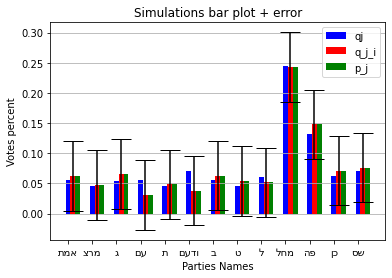

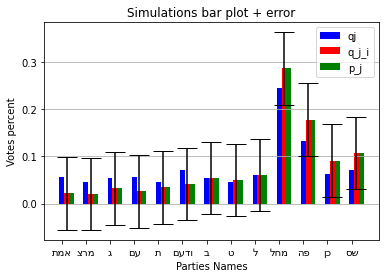

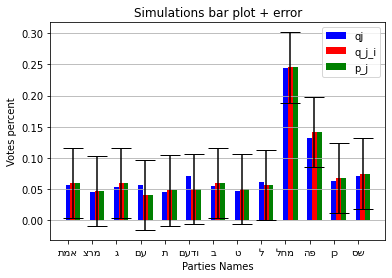

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f75fb0f1f50>)

In [97]:
def bar_plot(qj, qj_i, p_j, error_qj, error_pj):
    width = 0.2
    n = 13
    rev_names = [name[::-1] for name in list(n_tilda_df_2)]
    x_pos = np.arange(len(rev_names))
    fig, ax = plt.subplots()

    qj_bar = ax.bar(np.arange(n), list(qj), width, color='b')
    qj_i_bar = ax.bar(np.arange(n)+width, qj_i, width, color='r',yerr = error_qj, align='center', capsize=10,ecolor='black')
    p_j_bar = ax.bar(np.arange(n)+2*width, p_j, width, color='g', align='center',capsize=10,ecolor='black')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Simulations bar plot + error bars')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((qj_bar, qj_i_bar, p_j_bar), ('qj', 'q_j_i', 'p_j'))
    ax.yaxis.grid(True)
    plt.show()


    return fig, ax

bar_plot(n_ij, ex_1, q_j_alpha.mean(), ex_1.std(), q_j_alpha.std())
bar_plot(n_ij, ex_2, q_j_beta.mean(), ex_2.std(), q_j_beta.std())
bar_plot(n_ij, ex_3, q_j_beta2.mean(), ex_3.std(), q_j_beta2.std())